Shape: (128976, 21)
Columns: Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')
   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3X

C:\Users\shiba\AppData\Local\Temp\ipykernel_992\3921635778.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


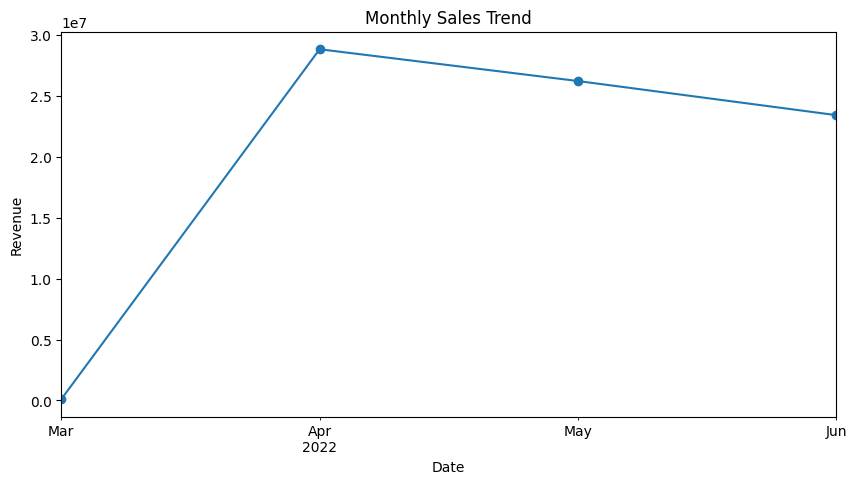

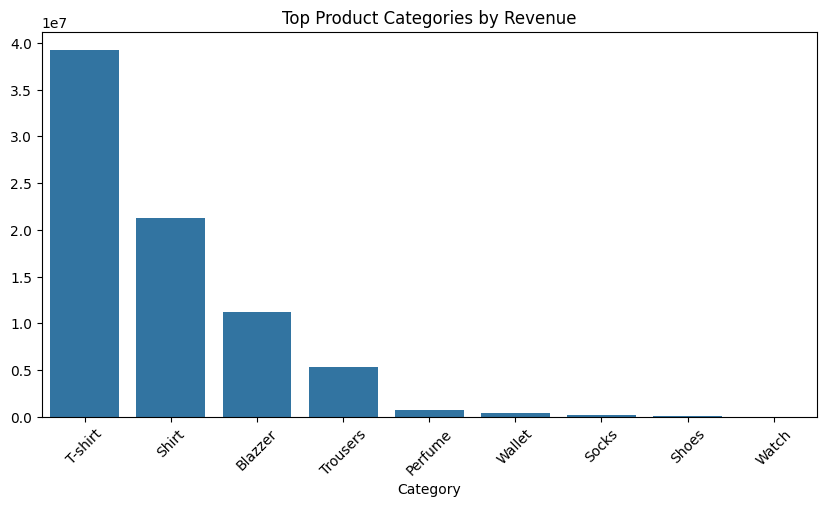

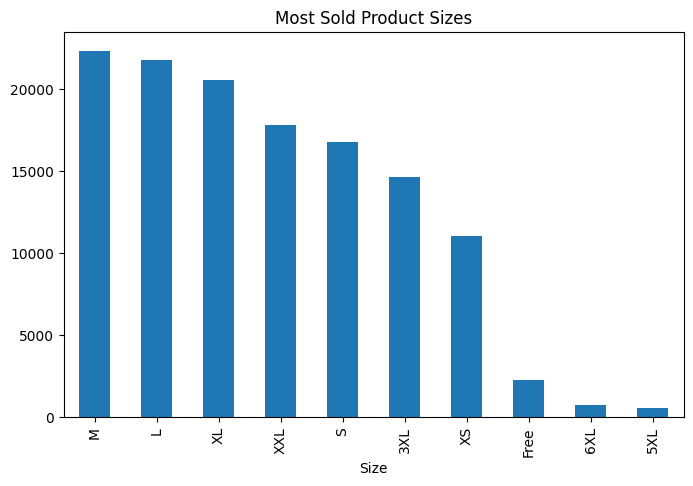

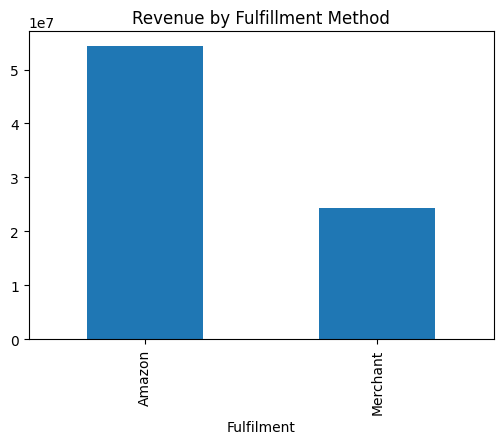


 Key Insights:
- Total Revenue: 78590170.24999997
- Total Unique Orders: 120229
- Best-selling Category: T-shirt


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r"C:\Users\shiba\Downloads\Amazon Sale Report.csv", encoding='latin1')
print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())


if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


#  SALES OVERVIEW

print("\nTotal Orders:", df['Order ID'].nunique())
print("Total Revenue:", df['Amount'].sum())


if 'Date' in df.columns:
    sales_trend = df.groupby(df['Date'].dt.to_period("M"))['Amount'].sum()
    sales_trend.plot(kind='line', marker='o', figsize=(10,5), title="Monthly Sales Trend")
    plt.ylabel("Revenue")
    plt.show()


#  PRODUCT ANALYSIS

if 'Category' in df.columns:
    top_products = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_products.index, y=top_products.values)
    plt.xticks(rotation=45)
    plt.title("Top Product Categories by Revenue")
    plt.show()

if 'Size' in df.columns:
    size_dist = df['Size'].value_counts().head(10)
    size_dist.plot(kind='bar', figsize=(8,5), title="Most Sold Product Sizes")
    plt.show()

#  FULFILLMENT ANALYSIS

if 'Fulfilment' in df.columns:
    fulfillment_perf = df.groupby('Fulfilment')['Amount'].sum()
    fulfillment_perf.plot(kind='bar', figsize=(6,4), title="Revenue by Fulfillment Method")
    plt.show()


#  CUSTOMER SEGMENTATION

if 'Ship City' in df.columns:
    top_customers = df.groupby('Ship City')['Amount'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_customers.index, y=top_customers.values)
    plt.xticks(rotation=45)
    plt.title("Top 10 Cities by Revenue")
    plt.show()


#  GEOGRAPHICAL ANALYSIS

if 'Ship State' in df.columns:
    state_sales = df.groupby('Ship State')['Amount'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=state_sales.index, y=state_sales.values)
    plt.xticks(rotation=45)
    plt.title("Top 10 States by Revenue")
    plt.show()




print("\n Key Insights:")
print("- Total Revenue:", df['Amount'].sum())
print("- Total Unique Orders:", df['Order ID'].nunique())
if 'Category' in df.columns:
    print("- Best-selling Category:", df.groupby('Category')['Amount'].sum().idxmax())
if 'Ship State' in df.columns:
    print("- Top State by Sales:", df.groupby('Ship State')['Amount'].sum().idxmax())
if 'Ship City' in df.columns:
    print("- Top City by Sales:", df.groupby('Ship City')['Amount'].sum().idxmax())


In [8]:
print(df.columns.tolist())


['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel', 'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS']


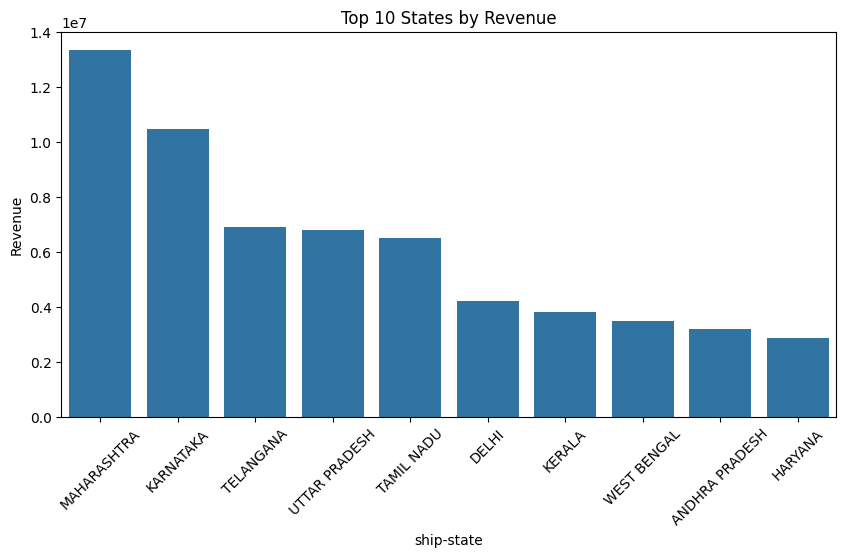

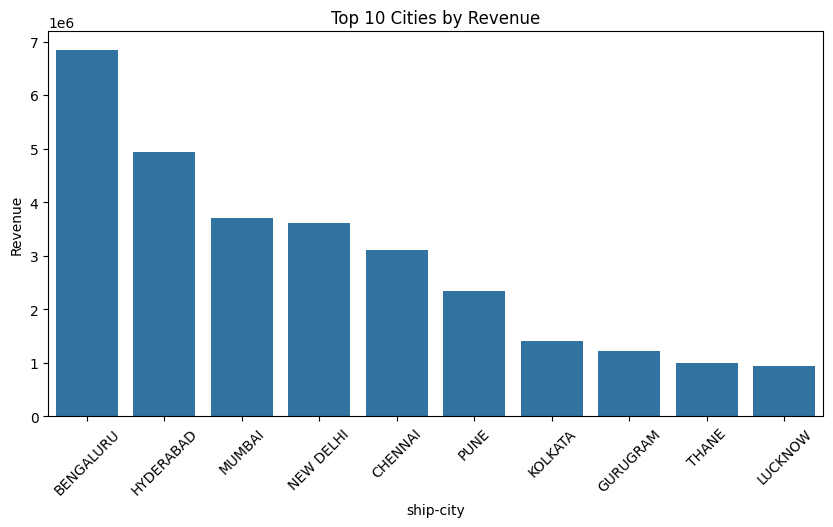

In [14]:


df.columns = df.columns.str.strip().str.lower()


# Top 10 States 

if 'ship state' in df.columns:
    state_col = 'ship state'
elif 'ship_state' in df.columns:
    state_col = 'ship_state'
elif 'ship-state' in df.columns:
    state_col = 'ship-state'
else:
    state_col = None

if state_col:
    top_states = df.groupby(state_col)['amount'].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(10,5))
    sns.barplot(x=top_states.index, y=top_states.values)
    plt.xticks(rotation=45)
    plt.title("Top 10 States by Revenue")
    plt.ylabel("Revenue")
    plt.show()
else:
    print(" Ship State column not found in dataset.")



# Top 10 Cities

if 'ship city' in df.columns:
    city_col = 'ship city'
elif 'ship_city' in df.columns:
    city_col = 'ship_city'
elif 'ship-city' in df.columns:
    city_col = 'ship-city'
else:
    city_col = None

if city_col:
    top_cities = df.groupby(city_col)['amount'].sum().sort_values(ascending=False).head(10)

    plt.figure(figsize=(10,5))
    sns.barplot(x=top_cities.index, y=top_cities.values)
    plt.xticks(rotation=45)
    plt.title("Top 10 Cities by Revenue")
    plt.ylabel("Revenue")
    plt.show()
else:
    print("Ship City column not found in dataset.")


In [15]:
print("\n KEY INSIGHTS FROM ANALYSIS:")

# Total Revenue
print("- Total Revenue:", df['amount'].sum())

# Total Unique Orders
if 'order id' in df.columns:
    print("- Total Unique Orders:", df['order id'].nunique())

# Best-selling Category
if 'category' in df.columns:
    best_cat = df.groupby('category')['amount'].sum().idxmax()
    print("- Best-selling Category:", best_cat)

# Top State
if state_col:
    top_state = df.groupby(state_col)['amount'].sum().idxmax()
    print("- Top State by Revenue:", top_state)

# Top City
if city_col:
    top_city = df.groupby(city_col)['amount'].sum().idxmax()
    print("- Top City by Revenue:", top_city)



 KEY INSIGHTS FROM ANALYSIS:
- Total Revenue: 78590170.24999997
- Total Unique Orders: 120229
- Best-selling Category: T-shirt
- Top State by Revenue: MAHARASHTRA
- Top City by Revenue: BENGALURU
